In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance/StudentsPerformance_with_headers.csv
/kaggle/input/students-performance/highereducationstudentsperformanceevaluation/DATA (1).csv


# > ***10)	Evaluation of K-Nearest Neighbours classifier performance on Sample Dataset with varying test size***

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.cluster import adjusted_rand_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = pd.read_csv("/kaggle/input/students-performance/highereducationstudentsperformanceevaluation/DATA (1).csv")
file.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [4]:
# Here, I've removed the column containing student IDs from the dataset.
file.drop("STUDENT ID",axis=1,inplace=True)
file.sample(5)

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
116,2,1,2,5,2,2,2,1,1,1,...,1,1,3,3,3,1,2,3,8,1
8,2,1,3,3,2,1,1,1,1,3,...,1,1,3,2,2,2,4,3,1,5
138,1,1,2,4,1,1,1,5,2,3,...,2,1,3,2,3,1,1,3,9,0
57,2,2,2,3,1,1,2,1,1,1,...,1,1,3,2,3,1,5,4,1,4
120,2,1,1,3,1,1,1,2,2,3,...,2,1,3,3,3,2,2,2,8,1


In [5]:
f = np.array(file)
X = file.iloc[:,:-1].values
y = file.iloc[:,-1].values

print(X.shape, len(y))

(145, 31) 145


In [6]:
clf = KNeighborsClassifier(n_neighbors = 3)

aris = []

j = [0.2,0.3,0.4,0.5]

In [7]:
for i in j:
    X_train, test_x, y_train, test_lab = train_test_split(X, y, test_size = i, random_state = 42)
    print(X_train.shape, test_x.shape, len(y_train), len(test_lab))
    
    clf = clf.fit(X_train, y_train)
    test_pred_deci_tree = clf.predict(test_x)
    
    print(test_lab, len(test_lab))
    print(test_pred_deci_tree, len(test_pred_deci_tree))
    
    print("ARI for 3", adjusted_rand_score(test_pred_deci_tree, test_lab))
    print("******************************************************")
    
    print("")
    aris.append(adjusted_rand_score(test_pred_deci_tree, test_lab))

(116, 31) (29, 31) 116 29
[5 5 1 3 1 1 3 6 7 2 0 3 0 4 6 2 2 3 6 7 6 0 0 5 3 3 4 4 2] 29
[1 1 1 1 1 1 3 2 3 1 1 5 0 3 5 1 1 2 7 1 3 1 2 5 1 5 1 7 2] 29
ARI for 3 -0.02544722549280261
******************************************************

(101, 31) (44, 31) 101 44
[5 5 1 3 1 1 3 6 7 2 0 3 0 4 6 2 2 3 6 7 6 0 0 5 3 3 4 4 2 0 1 1 1 2 1 2 1
 2 1 7 2 6 2 1] 44
[1 1 1 1 1 1 3 7 3 1 4 5 0 3 5 1 1 2 7 7 3 0 2 5 1 5 1 7 2 1 1 1 0 1 1 2 1
 2 1 7 7 1 1 3] 44
ARI for 3 0.10822655577452564
******************************************************

(87, 31) (58, 31) 87 58
[5 5 1 3 1 1 3 6 7 2 0 3 0 4 6 2 2 3 6 7 6 0 0 5 3 3 4 4 2 0 1 1 1 2 1 2 1
 2 1 7 2 6 2 1 2 3 1 4 2 3 1 4 5 1 2 7 1 5] 58
[1 1 1 1 1 1 3 7 3 1 4 5 0 6 3 1 1 2 1 3 3 0 2 5 1 5 1 7 2 1 2 1 0 1 1 1 1
 2 1 7 7 1 1 2 1 1 2 7 1 1 1 3 3 5 1 1 1 5] 58
ARI for 3 0.08478750620489518
******************************************************

(72, 31) (73, 31) 72 73
[5 5 1 3 1 1 3 6 7 2 0 3 0 4 6 2 2 3 6 7 6 0 0 5 3 3 4 4 2 0 1 1 1 2 1 2 1
 2 1 7 2

[-0.02544722549280261, 0.10822655577452564, 0.08478750620489518, 0.09370352007932573]
[0.2, 0.3, 0.4, 0.5]


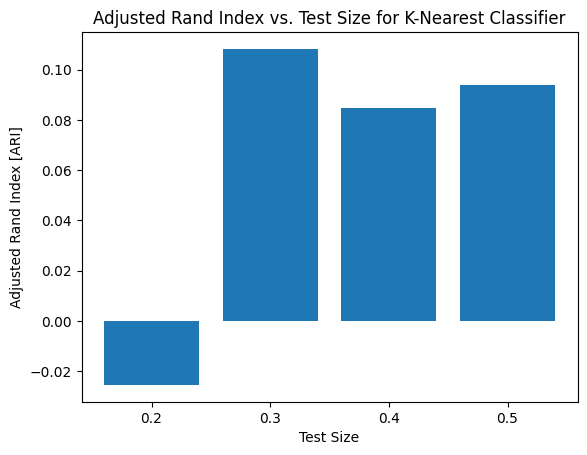

In [8]:
# plotting
j1 = ["0.2","0.3","0.4","0.5"]
print(aris)
print(j)

fig = plt.figure()
plt.bar(j1, aris)
plt.xlabel("Test Size")
plt.ylabel("Adjusted Rand Index [ARI]")
plt.title("Adjusted Rand Index vs. Test Size for K-Nearest Classifier")
plt.show()